# Edge Detection 
This notebook implements edge detection from Coursera Deep learning course

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

Make Simple images with vertical and horizontal edges

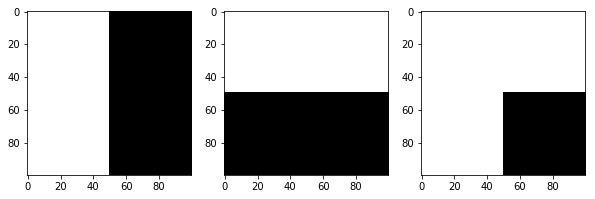

In [13]:
w = 100
h = 100
img_vertical = np.zeros(shape=(w, h))
img_vertical[:, :int(h/2)] = 255
img_horizontal = np.zeros(shape=(w, h))
img_horizontal[:int(w/2), :] = 255
img_combined = img_vertical.copy()
img_combined[:int(w/2), :] = 255

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(131)
ax1.imshow(img_vertical, cmap="gray")
ax2 = fig.add_subplot(132)
ax2.imshow(img_horizontal, cmap="gray")
ax3 = fig.add_subplot(133)
ax3.imshow(img_combined, cmap="gray")
plt.show()

Simple Vertical Edge Detection using convolution

In [3]:
def edge_detect(img, kernel_arr):
    # Convert img array into shape of (1, w, h, 1) 
    # s.t. tensorflow can handle it. 
    w = img.shape[0]
    h = img.shape[1]
    img = img.reshape((1, w, h, 1))

    #Run convolution on the image array with the filter 
    img_input = tf.placeholder(dtype=tf.float32, shape=(1, w, h, 1))
    kernel = tf.constant(value=kernel_arr)
    edge_detected = tf.nn.conv2d(input=img_input, filter=kernel, strides=(1, 1, 1, 1), padding="VALID")
    with tf.Session() as sess:
        detected = sess.run(edge_detected, feed_dict={img_input: img})
        detected = detected/detected.max()*255
        return detected[0, :, :, 0]

Detect vertical line 

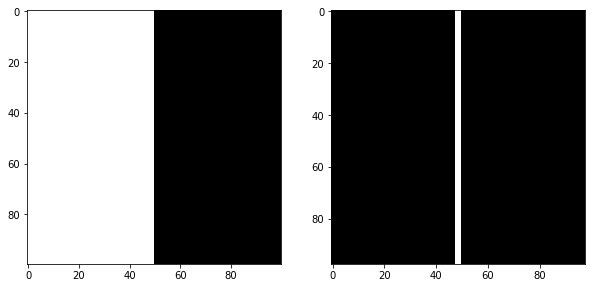

In [8]:
# define 3x3 filter  
kernel_ver = np.array([[3, 0, -3]]*3, dtype="float32")
kernel_ver = kernel_ver.reshape(3, 3, 1, 1)

# run edge detection 
detected = edge_detect(img_vertical, kernel_ver)

# show result 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(img_vertical, cmap="gray")
ax2 = fig.add_subplot(122)
ax2.imshow(detected, cmap="gray")
plt.show()

Detect Horizontal line

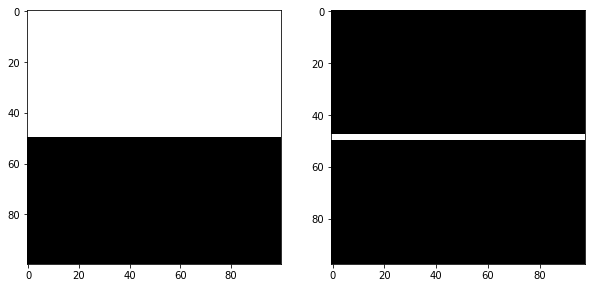

In [17]:
# define 3x3 filter  
kernel_hor = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]], dtype="float32")
kernel_hor = kernel_hor.reshape(3, 3, 1, 1)

# run edge detection 
detected = edge_detect(img_horizontal, kernel_hor)

# show result 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(img_horizontal, cmap="gray")
ax2 = fig.add_subplot(122)
ax2.imshow(detected, cmap="gray")
plt.show()

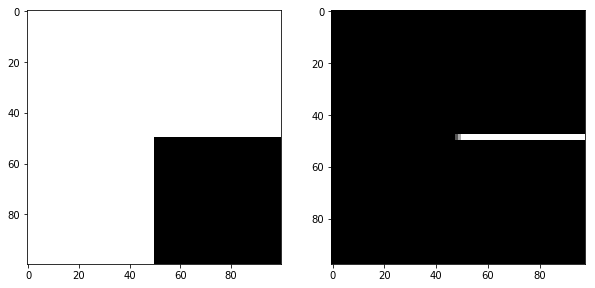

In [19]:
# run edge detection 
detected = edge_detect(img_combined, kernel_hor)

# show result 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(img_combined, cmap="gray")
ax2 = fig.add_subplot(122)
ax2.imshow(detected, cmap="gray")
plt.show()

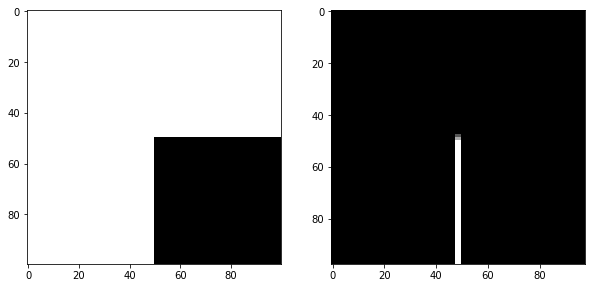

In [20]:
# run edge detection 
detected = edge_detect(img_combined, kernel_ver)

# show result 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax1.imshow(img_combined, cmap="gray")
ax2 = fig.add_subplot(122)
ax2.imshow(detected, cmap="gray")
plt.show()